In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [36]:
X_df = pd.read_pickle('../features/features.pkl')
y = X_df['Classification']

X_train, X_test, y_train, y_test = train_test_split(
  X_df, y, test_size=0.3, random_state=42, stratify=y
)

In [37]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [39]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_df.drop(columns="Classification"), y, cv=cv, scoring="f1")

print("F1 Scores:", scores)
print("Mean F1:", scores.mean())
print("Std F1:", scores.std())

F1 Scores: [0.66666667 0.         1.        ]
Mean F1: 0.5555555555555555
Std F1: 0.41573970964154905


In [ ]:
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,1.000000,0.666667,0.8,3.0
1,0.666667,1.000000,0.8,2.0
accuracy,0.800000,0.800000,0.8,0.8
macro avg,0.833333,0.833333,0.8,5.0
weighted avg,0.866667,0.800000,0.8,5.0


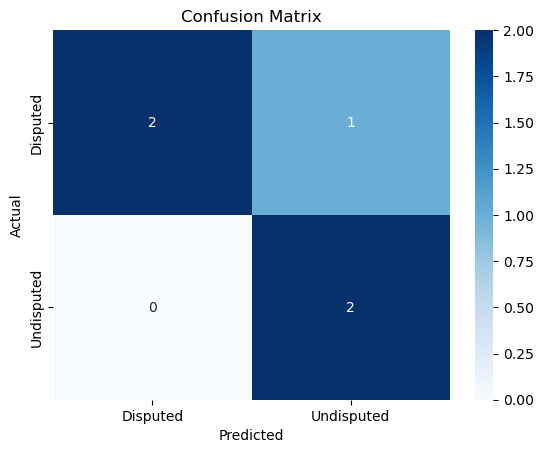

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Disputed", "Undisputed"], yticklabels=["Disputed", "Undisputed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()